In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cab = pd.read_csv('Datasets\Cab_Data.csv')
cab.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
city = pd.read_csv("Datasets\City.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
customer = pd.read_csv("Datasets\Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
transaction = pd.read_csv("Datasets\Transaction_ID.csv")
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [11]:
print("Shape of Cab Dataset:",cab.shape)
print("Shape of City Dataset:",city.shape)
print("Shape of Customer Dataset:",customer.shape)
print("Shape of Transactions Dataset:",transaction.shape)

Shape of Cab Dataset: (359392, 7)
Shape of City Dataset: (20, 3)
Shape of Customer Dataset: (49171, 4)
Shape of Transactions Dataset: (440098, 3)


In [12]:
cab_df=cab.copy()
city_df=city.copy()
customer_df=customer.copy()
transaction_df= transaction.copy()

In [14]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [21]:
# Convert Excel serial number to datetime
cab_df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_df['Date of Travel'], unit='D')


In [23]:
cab_df['Date of Travel'].head()

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]

In [16]:
cab_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [17]:
cab_df.describe(include=['O'])

,Company,City
count,359392,359392
unique,2,19
top,Yellow Cab,NEW YORK NY
freq,274681,99885


In [19]:
cab_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [20]:
cab_df.City.value_counts()

City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [30]:
cab_df.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Trip Type         0
dtype: int64

In [32]:
cab_df.duplicated().sum()

0

In [39]:
print("Total Records:",cab_df.shape[0])
print("No of unique transaction_ids:",len(cab_df['Transaction ID'].unique()))

Total Records: 359392
No of unique transaction_ids: 359392


Data Distribution Analysis

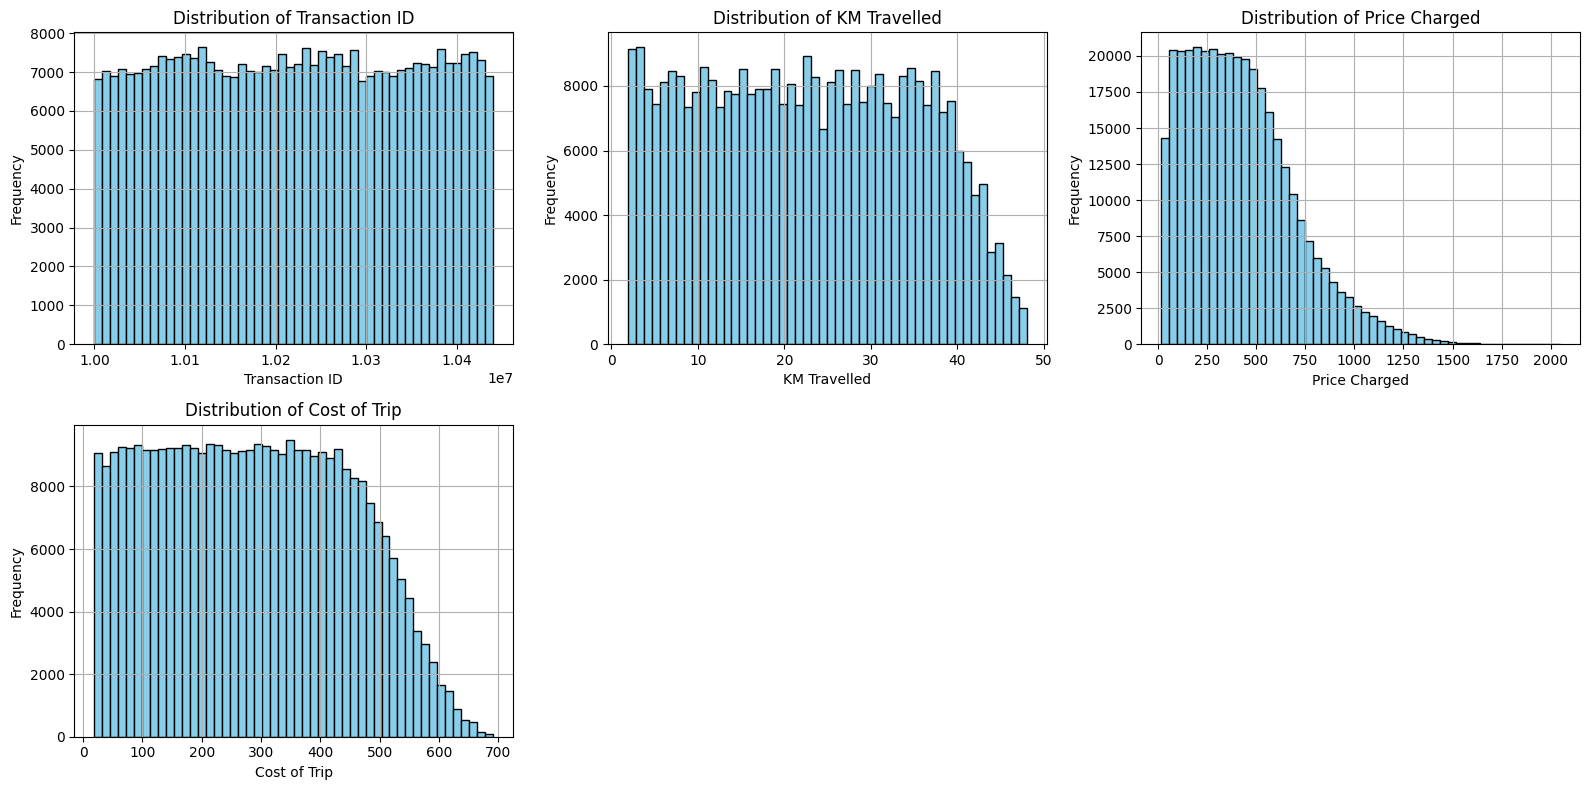

In [33]:
numeric_cols = cab_df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplot grid
num_cols = len(numeric_cols)
cols = 3
rows = (num_cols + cols - 1) // cols  # Ceiling division

plt.figure(figsize=(16, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(cab_df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Outlier detection


In [24]:
Q1 = cab_df['Price Charged'].quantile(0.25)
Q3 = cab_df['Price Charged'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Outlier filter
outliers_price = cab_df[cab_df['Price Charged'] > upper_bound]
print(f"Price Charged Outliers: {len(outliers_price)}")

Price Charged Outliers: 5958


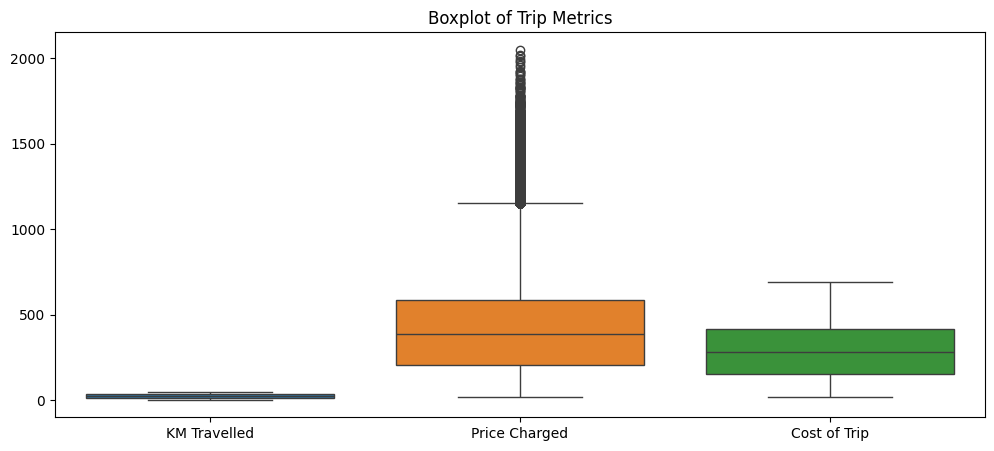

In [25]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=cab_df[['KM Travelled', 'Price Charged', 'Cost of Trip']])
plt.title("Boxplot of Trip Metrics")
plt.show()

<Axes: xlabel='KM Travelled', ylabel='Price Charged'>

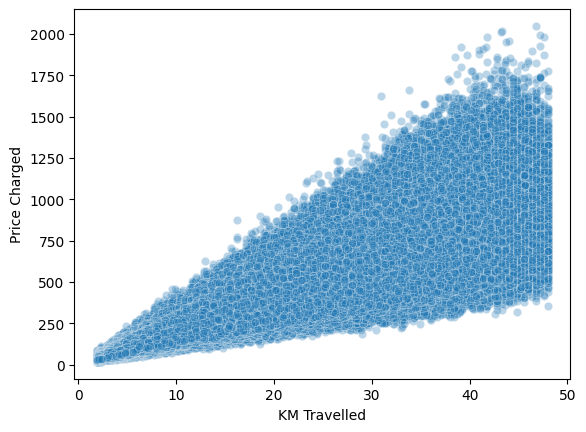

In [26]:
sns.scatterplot(data=cab_df, x='KM Travelled', y='Price Charged', alpha=0.3)

In [27]:
cab_df['Trip Type'] = np.where(cab_df['Price Charged'] > upper_bound, 'High Value', 'Typical')

In [28]:
cab_df['Trip Type'].value_counts()

Trip Type
Typical       353434
High Value      5958
Name: count, dtype: int64

In [34]:
cab_df['Month'] = cab_df['Date of Travel'].dt.month
cab_df['Year'] = cab_df['Date of Travel'].dt.year
cab_df['Weekday'] = cab_df['Date of Travel'].dt.day_name()
cab_df['Profit'] = cab_df['Price Charged'] - cab_df['Cost of Trip']
cab_df['Margin %'] = (cab_df['Profit'] / cab_df['Price Charged']) * 100

In [35]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Trip Type', 'Month', 'Year',
       'Weekday', 'Profit', 'Margin %'],
      dtype='object')

City df

In [40]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [41]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [42]:
city_df['Population'] = city_df['Population'].str.replace(',', '').astype(int)
city_df['Users'] = city_df['Users'].str.replace(',', '').astype(int)

In [43]:
city_df.dtypes

City          object
Population     int32
Users          int32
dtype: object

In [45]:
city_df.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [51]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [53]:
city_df.City.value_counts()

City
NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: count, dtype: int64

In [54]:
set(cab_df['City'].unique()) - set(city_df['City'].unique())

set()

In [55]:
cab_df = cab_df.merge(city_df, on='City', how='left')

In [56]:
cab_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Trip Type', 'Month', 'Year',
       'Weekday', 'Profit', 'Margin %', 'Population', 'Users'],
      dtype='object')

In [57]:
cab_df['User Penetration %'] = (cab_df['Users'] / cab_df['Population']) * 100